# NLP - Email Spam Filter

## 0. Problem Statement

- The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

- The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.


## 1. Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
email_df = pd.read_csv("/Users/mcardonasanchez/Desktop/Online Courses/Projects/NLP-Email-Spam-Filter/emails.csv")
email_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [3]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [4]:
email_df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

## 2. Visualise Data

In [5]:
ham = email_df[email_df['spam']==0]
spam = email_df[email_df['spam']==1]

In [6]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [7]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [8]:
print('Spam percentage: {:.3f}%'.format(len(spam)/len(email_df)))
print('Ham percentage: {:.3f}%'.format(len(ham)/len(email_df)))

Spam percentage: 0.239%
Ham percentage: 0.761%


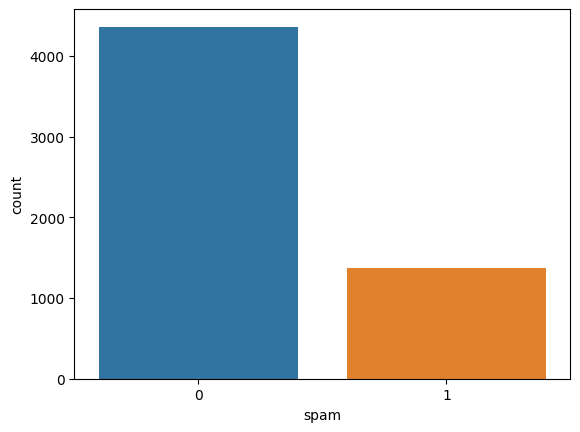

In [9]:
sns.countplot(email_df, x='spam', label = "Count");

## 3. Data Pre-processing

### 3.1. Data Cleaning

In [10]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
# import nltk
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


: 

: 

In [11]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    Test_punc_removed_join_clean = ' '.join(Test_punc_removed_join_clean)
    return Test_punc_removed_join_clean

In [29]:
email_df_clean = email_df['text'].apply(message_cleaning)

In [30]:
email_df_clean = email_df_clean.to_frame()

In [31]:
email_df_clean

,text
0,Subject naturally irresistible corporate ident...
1,Subject stock trading gunslinger fanny merrill...
2,Subject unbelievable new homes made easy im wa...
3,Subject 4 color printing special request addit...
4,Subject money get software cds software compat...
...,...
5723,Subject research development charges gpg forwa...
5724,Subject receipts visit jim thanks invitation v...
5725,Subject enron case study update wow day super ...
5726,Subject interest david please call shirley cre...


### 3.1. Count Vectorizer

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
spam_ham_vectorizer = vectorizer.fit_transform(email_df_clean['text'])

In [33]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzn', 'zzncacst', 'zzzz'], dtype=object)

In [34]:
spam_ham_vectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
spam_ham_vectorizer.shape

(5728, 37187)

## 4. Train Model

In [36]:
X = spam_ham_vectorizer
y = email_df['spam'].values

In [37]:
print(X.shape)
print(y.shape)

(5728, 37187)
(5728,)


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [40]:
testing_sample = ['Free money!!!', "Hi Kim, Please let me know if you need any further information. Thanks"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0])

In [47]:
testing_sample = ["Hello, I am Ryan, I would like to book a hotel in SF by January 24th", 'money viagra!!!!!']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([0, 1])

## 5. Evaluate Model

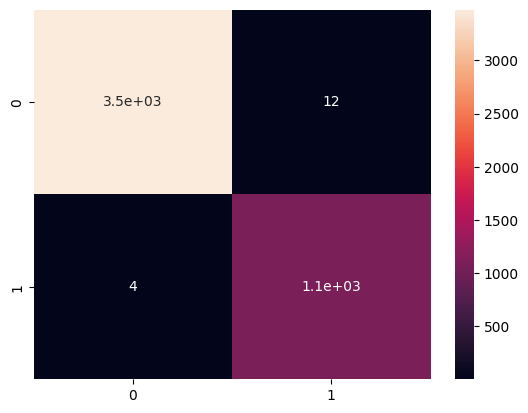

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True);

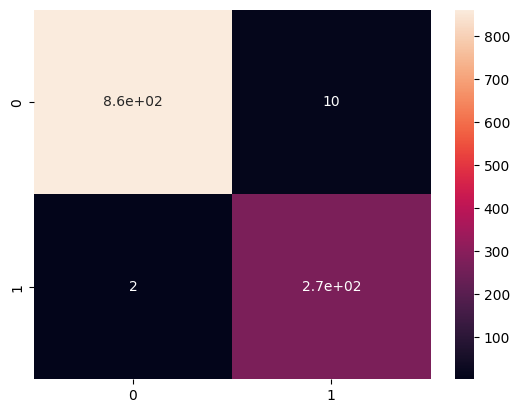

In [43]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True);

In [45]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       872
           1       0.96      0.99      0.98       274

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



## 6. TF-IDF

- TF-IDF stands for "Term Frequency–Inverse Document Frequency" is a numerical statistic used to reflect how important a word is to a document in a collection or corpus of documents. 
- TF-IDF is used as a weighting factor during text search processes and text mining.
- The intuition behing the TF-IDF is as follows: if a word appears several times in a given document, this word might be meaningful (more important) than other words that appeared fewer times in the same document. However, if a given word appeared several times in a given document but also appeared many times in other documents, there is a probability that this word might be common frequent word such as 'I' 'am'..etc. (not really important or meaningful!).


- TF: Term Frequency is used to measure the frequency of term occurrence in a document: 
    - TF(word) = Number of times the 'word' appears in a document / Total number of terms in the document
- IDF: Inverse Document Frequency is used to measure how important a term is: 
    - IDF(word) = log_e(Total number of documents / Number of documents with the term 'word' in it).

- Example: Let's assume we have a document that contains 1000 words and the term “John” appeared 20 times, the Term-Frequency for the word 'John' can be calculated as follows:
    - TF|john = 20/1000 = 0.02

- Let's calculate the IDF (inverse document frequency) of the word 'john' assuming that it appears 50,000 times in a 1,000,000 million documents (corpus). 
    - IDF|john = log (1,000,000/50,000) = 1.3

- Therefore the overall weight of the word 'john' is as follows 
    - TF-IDF|john = 0.02 * 1.3 = 0.026

In [48]:
from sklearn.feature_extraction.text import TfidfTransformer

emails_tfidf = TfidfTransformer().fit_transform(spam_ham_vectorizer)
print(emails_tfidf.shape)

(5728, 37187)


In [49]:
print(emails_tfidf[:,:])

  (0, 36525)	0.06908944889543289
  (0, 36392)	0.06757047739651872
  (0, 36390)	0.059679365326344706
  (0, 35985)	0.1319392730989776
  (0, 34996)	0.05233428188145157
  (0, 34762)	0.09384305652743173
  (0, 33525)	0.06921203533637368
  (0, 33000)	0.09490328795519132
  (0, 32806)	0.06073679014431701
  (0, 32580)	0.11152518721878715
  (0, 32565)	0.11962021118089677
  (0, 32301)	0.017223322243491098
  (0, 32282)	0.11962021118089677
  (0, 32226)	0.0789584619498058
  (0, 31931)	0.11850864343422601
  (0, 31922)	0.08499360588016656
  (0, 31510)	0.10454173100334828
  (0, 30181)	0.04607380847274443
  (0, 29821)	0.09333645170409068
  (0, 28842)	0.07691781511072393
  (0, 28229)	0.09213153238881405
  (0, 28073)	0.11014658587128429
  (0, 27949)	0.06591875520600377
  (0, 27190)	0.0732875367149963
  (0, 27189)	0.05761542024424838
  :	:
  (5727, 9139)	0.04914589299631069
  (5727, 8849)	0.04088097297082128
  (5727, 8603)	0.06353232841615358
  (5727, 8319)	0.0308844354788276
  (5727, 8196)	0.04106254971624

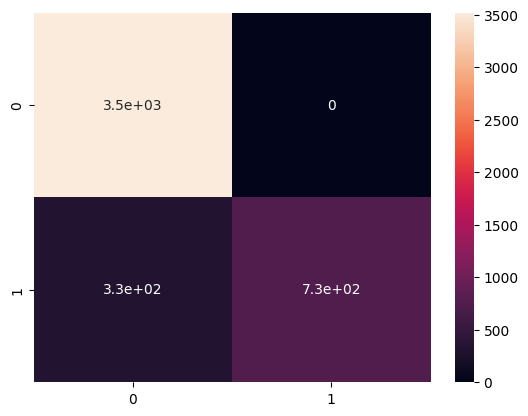

In [50]:
X = emails_tfidf
y = email_df['spam'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True);

In [51]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       838
           1       0.28      0.25      0.26       308

    accuracy                           0.62      1146
   macro avg       0.51      0.50      0.50      1146
weighted avg       0.61      0.62      0.62      1146

